 #  Лабораторная работа №2
 

Используем датасет из первой лабораторной работы

Добавим в наш исходный датасет новый атрибут: Average App Usage Time (AAUT) - среднее время использования одного приложения в день (в минутах). AAUT = AUT (App Usage Time) / NoAI (Number of Apps Installed)

Считываем датасет :

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn

data = pd.read_csv("../dataset/mobile_devices.csv")

Добавим новый атрибут :

In [4]:
aaut_list = []
for i, row in data.iterrows():
    aut = row['App Usage Time (min/day)']
    aaut = aut / row['Number of Apps Installed']
    aaut_list.append(aaut)

aaut = pd.Series(aaut_list)
data.insert(0, "Average App Usage Time", aaut)

In [5]:
# сводка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average App Usage Time      700 non-null    float64
 1   User ID                     700 non-null    int64  
 2   Device Model                700 non-null    object 
 3   Operating System            700 non-null    object 
 4   App Usage Time (min/day)    700 non-null    int64  
 5   Screen On Time (hours/day)  700 non-null    float64
 6   Battery Drain (mAh/day)     700 non-null    int64  
 7   Number of Apps Installed    700 non-null    int64  
 8   Data Usage (MB/day)         700 non-null    int64  
 9   Age                         700 non-null    int64  
 10  Gender                      700 non-null    object 
 11  User Behavior Class         700 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 65.8+ KB


# Причешем наш датасет


Для построения графиков зависимостей атрибутов, сперва удалим все данные с ненужной информацией

In [7]:
data = data.drop(['Device Model', 'Operating System', 'Gender', 'User Behavior Class'], axis="columns")
data = data.dropna()

Нормализуем оставшиеся значения:

In [8]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
normed_data = normalizer.fit_transform(data)
data = pd.DataFrame(normed_data, columns=data.columns.tolist())

Отбросим данные с выбросами по Z-Score (Z-Score < 2):

In [9]:
from scipy import stats
data.info()
for attr in data:
    attr_zscore = np.abs(stats.zscore(data[attr]))
    data[attr] = data[attr][attr_zscore<3]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average App Usage Time      700 non-null    float64
 1   User ID                     700 non-null    float64
 2   App Usage Time (min/day)    700 non-null    float64
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    float64
 5   Number of Apps Installed    700 non-null    float64
 6   Data Usage (MB/day)         700 non-null    float64
 7   Age                         700 non-null    float64
dtypes: float64(8)
memory usage: 43.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average App Usage Time      700 non-null    float64
 1   User 

In [10]:
for attr in data:
    data[attr] = data[attr].fillna(0.5)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average App Usage Time      700 non-null    float64
 1   User ID                     700 non-null    float64
 2   App Usage Time (min/day)    700 non-null    float64
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    float64
 5   Number of Apps Installed    700 non-null    float64
 6   Data Usage (MB/day)         700 non-null    float64
 7   Age                         700 non-null    float64
dtypes: float64(8)
memory usage: 43.9 KB


# Построим графики зависимостей 

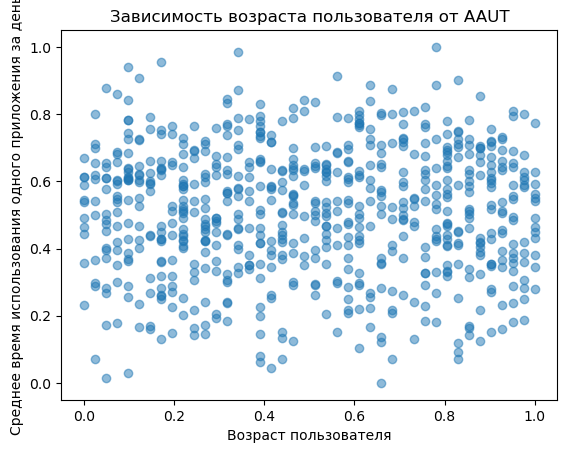

In [18]:
# График 1: Зависимость возраста пользователя от AAUT
plt.scatter(data['Age'], data['Average App Usage Time'], alpha=0.5)
plt.xlabel('Возраст пользователя')
plt.ylabel('Среднее время использования одного приложения за день')
plt.title('Зависимость возраста пользователя от AAUT')
plt.show()

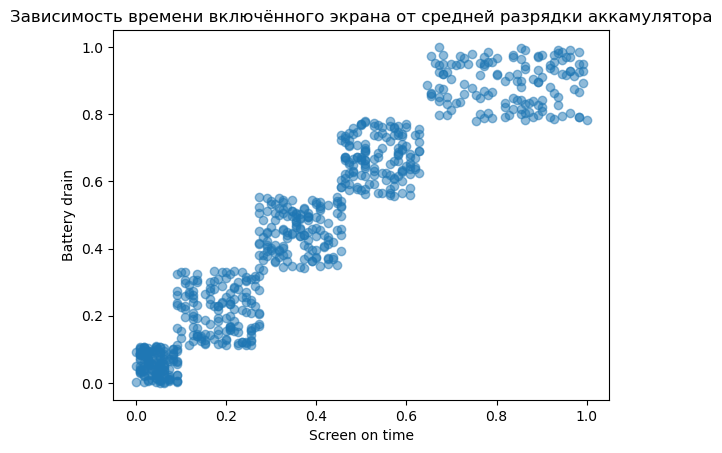

In [12]:
# График 2: Зависимость времени включённого экрана и разрядки аккамулятора
plt.scatter(data['Screen On Time (hours/day)'], data['Battery Drain (mAh/day)'], alpha=0.5)
plt.xlabel('Screen on time')
plt.ylabel('Battery drain')
plt.title('Зависимость времени включённого экрана от средней разрядки аккамулятора')
plt.show()

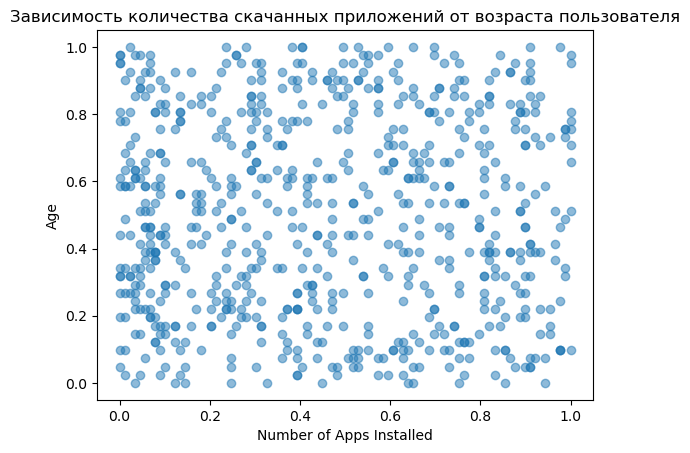

In [13]:
# График 3: Зависимость количества скачанных приложений от возраста пользователя
plt.scatter(data['Number of Apps Installed'], data['Age'], alpha=0.5)
plt.xlabel('Number of Apps Installed')
plt.ylabel('Age')
plt.title('Зависимость количества скачанных приложений от возраста пользователя')
plt.show()

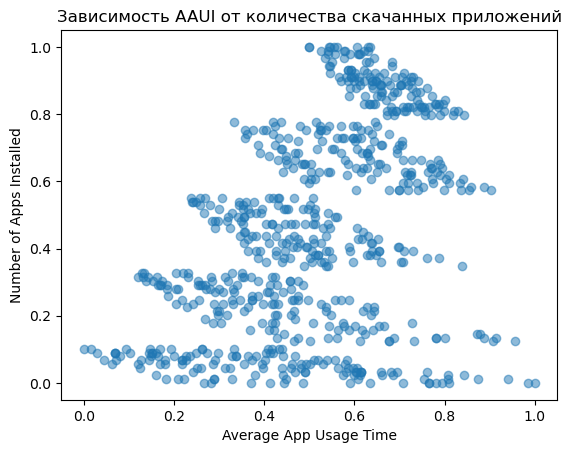

In [19]:
# График 4: Зависимость количества скачанных приложений от возраста пользователя
plt.scatter(data['Average App Usage Time'], data['Number of Apps Installed'], alpha=0.5)
plt.xlabel('Average App Usage Time')
plt.ylabel('Number of Apps Installed')
plt.title('Зависимость AAUI от количества скачанных приложений')
plt.show()

In [21]:
# Построим матрицу графиков рассеивания

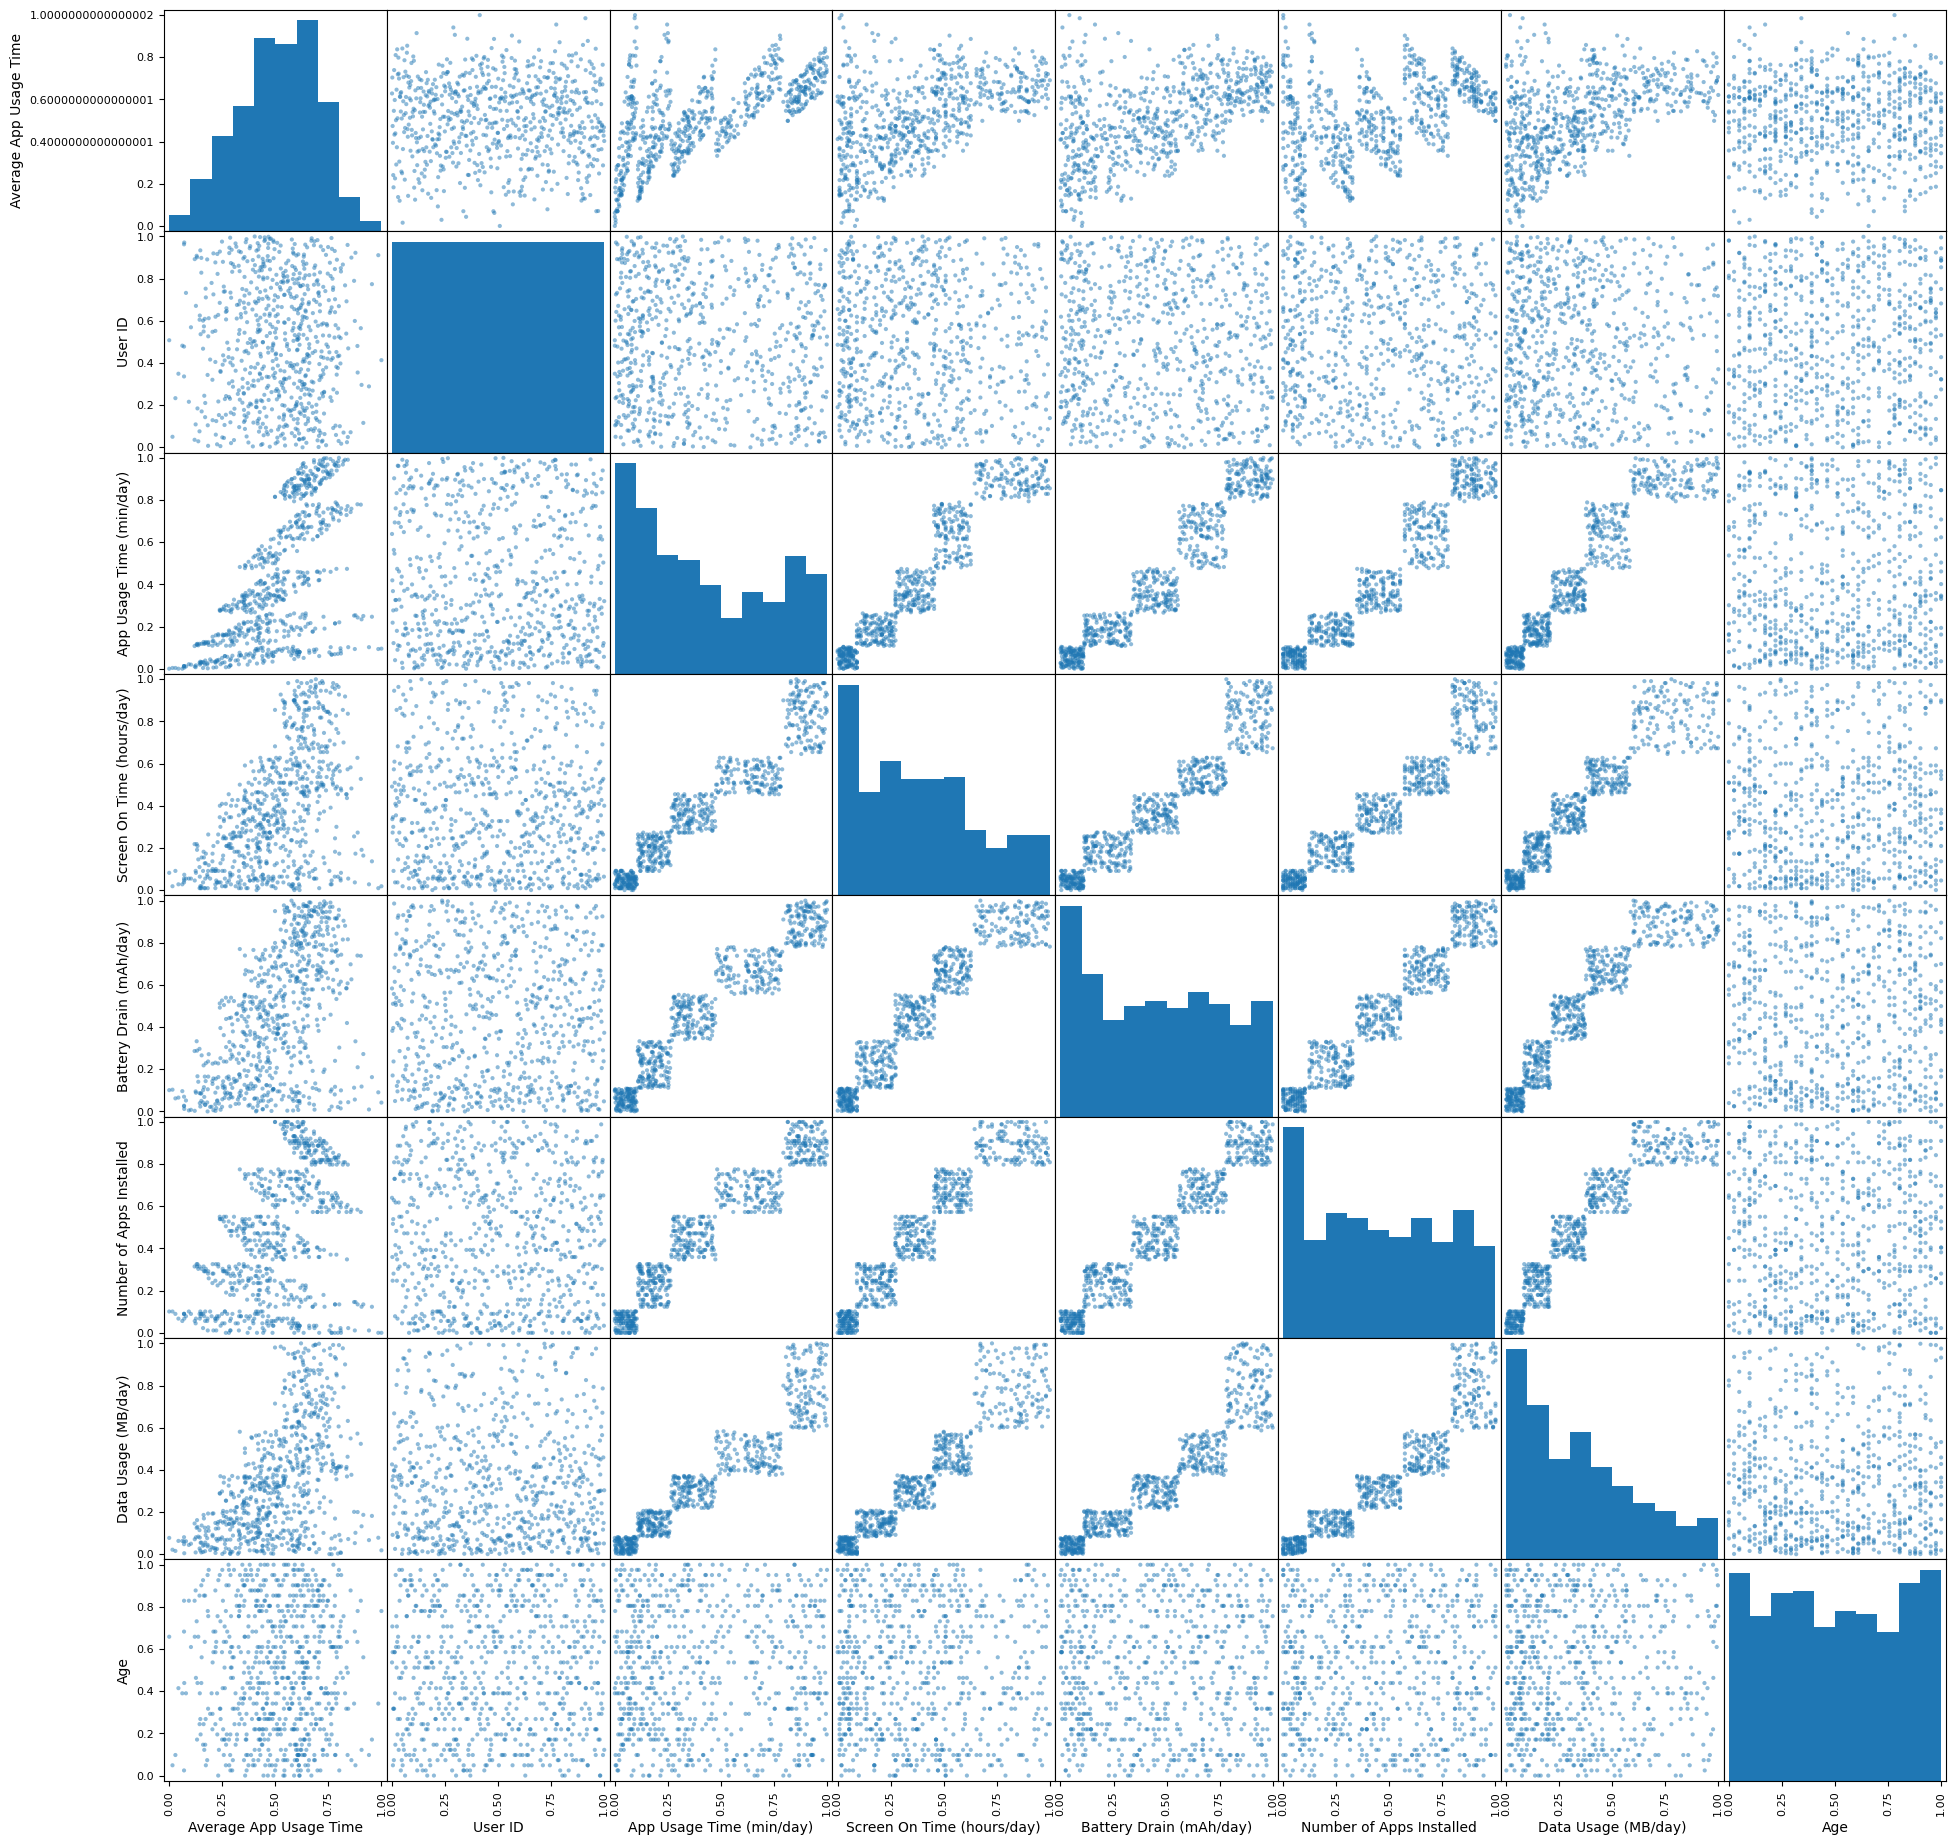

In [20]:

scatter = pd.plotting.scatter_matrix(
    data,
    figsize=(23, 23)
)

По данным графиков тяжело рассмотреть какие-либо кластеры

# Применим метод K-средних к датасету

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


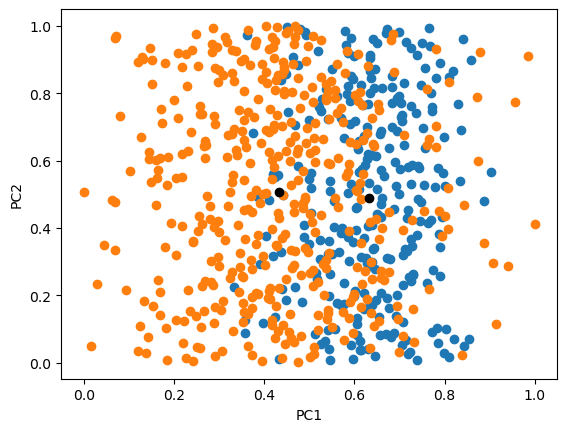

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


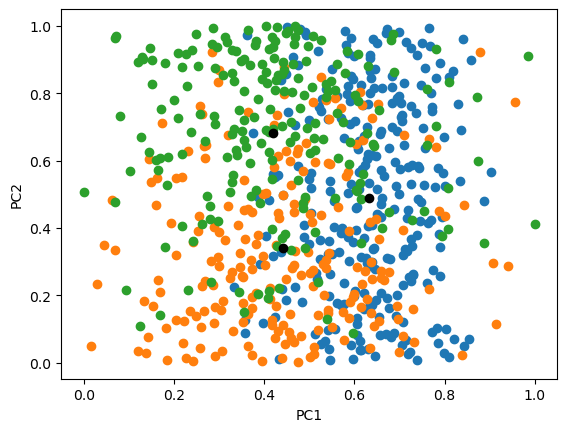

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


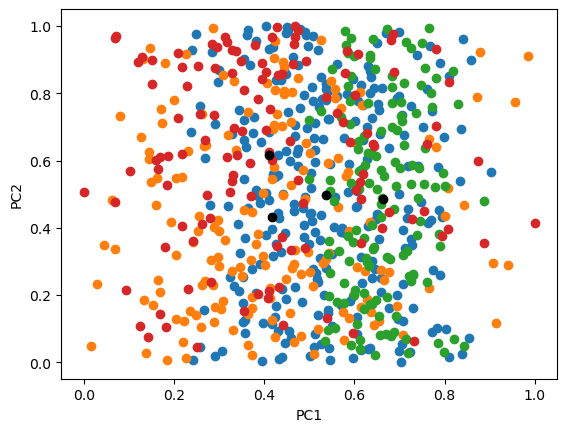

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


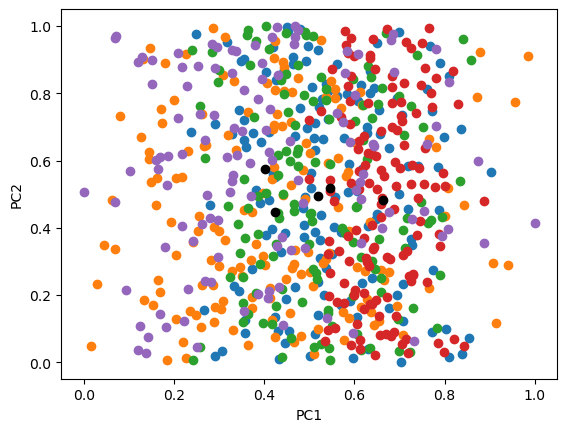

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


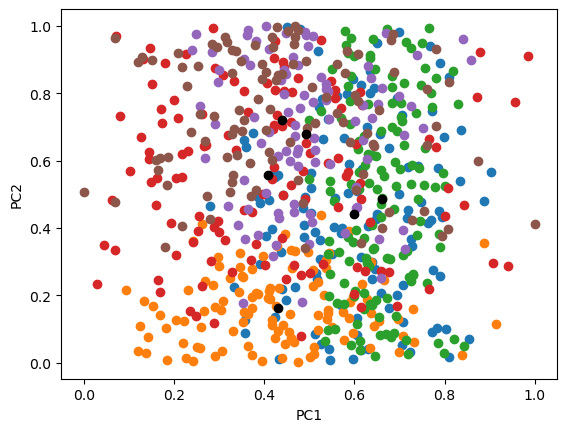

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


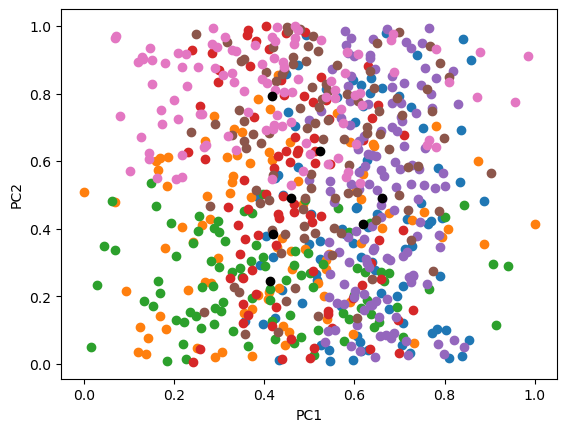

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


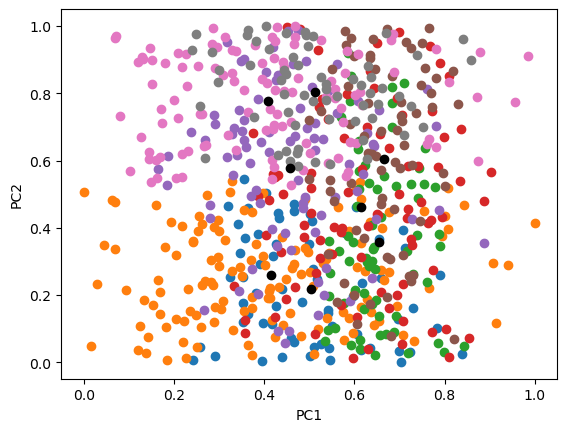

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


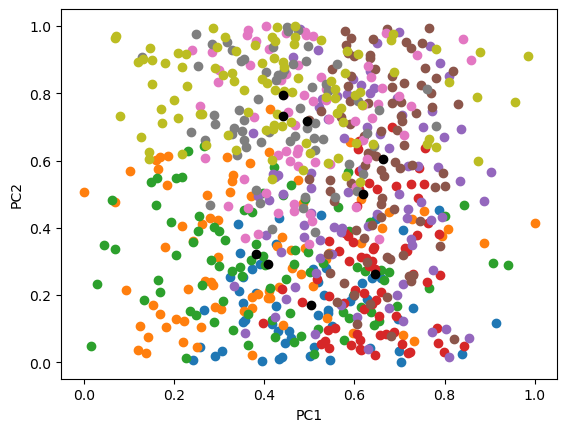

C:\Users\kaban\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


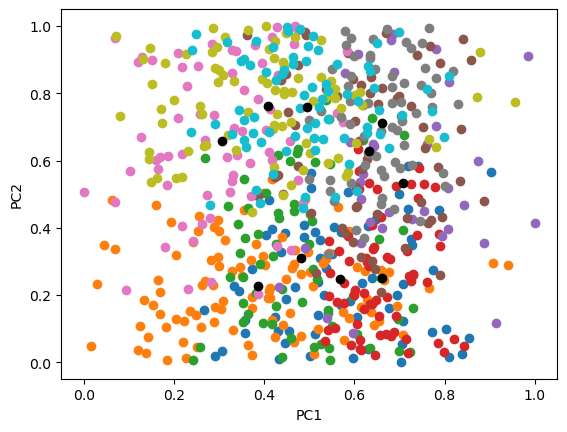

In [26]:
from sklearn.cluster import KMeans

# максимальное число кластеров, которых хотим получить
max_clusters = 6

for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)

    centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    data_plot = data.to_numpy()
    
    labels_map = dict()
    
    for i, el in enumerate(labels):
        v = labels_map.get(el)
        if v is not None and len(v) >= 0:
            labels_map[el].append(data_plot[i])
        else:
            labels_map[el] = []


    plt.xlabel("PC1")
    plt.ylabel("PC2")
    
    
    for label in labels_map.keys():
        x = []
        y = []
        for coord in labels_map[label]:
            x.append(coord[0])
            y.append(coord[1])
        plt.scatter(x, y)
    plt.scatter(centers[:, 0], centers[:, 1], c='black')
    plt.show()

# Вывод


В ходе работы мы добавили новый аттрибут в существующий датасет, затем этот датасет был "причёсан" (проведена нормализация и стандартизация).

Затем мы построили матрицу графиков рассеиван а и посмотрели, каким образом этот уменьшенный датасет будет разбиваться на произольное число кластеров методом К-средних